In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('/content/sample_data/AQI_Dataset_Winter2024-25 - Sheet1.csv')
df.head()

,time,pm2.5,pm10,co,so2,no2,o3,aqi,aqi_6
0,23,150,260,1160,4,13,9,322,177
1,0,132,196,968,4,13,11,295,283
2,1,99,150,710,4,13,14,228,298
3,2,77,139,679,5,13,13,155,311
4,3,76,137,689,5,12,14,153,308


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [ ]:
X = df.drop(columns=['aqi_6'],axis=1)
y = df['aqi_6']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=123)

X_train = np.array(X_train, dtype=np.float32)
X_test = np.array(X_test, dtype=np.float32)
y_train = np.array(y_train, dtype=np.float32)
y_test = np.array(y_test, dtype=np.float32)

# Alternative of Bayesian Inference

### Gaussian Processes

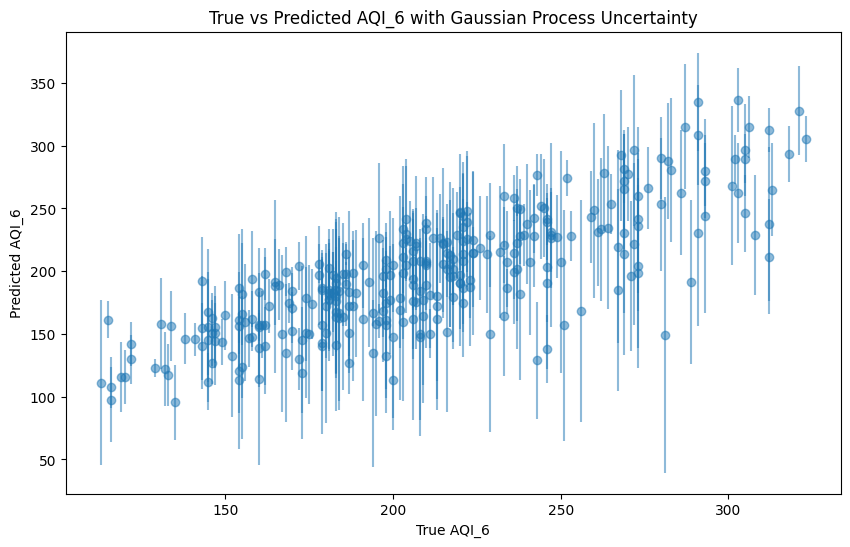

In [ ]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel
import matplotlib.pyplot as plt

# Define the kernel
kernel = ConstantKernel(1.0) * RBF(length_scale=1.0)

# Create the GP model
gp = GaussianProcessRegressor(kernel=kernel, alpha=1e-5, n_restarts_optimizer=10)

# Train the GP model
gp.fit(X_train, y_train)

# Predict with uncertainty
y_mean, y_std = gp.predict(X_test, return_std=True)

# Plot the results with uncertainty
plt.figure(figsize=(10, 6))
plt.errorbar(y_test, y_mean, yerr=y_std, fmt='o', alpha=0.5)
plt.xlabel('True AQI_6')
plt.ylabel('Predicted AQI_6')
plt.title('True vs Predicted AQI_6 with Gaussian Process Uncertainty')
plt.show()

## Partial Dependence Plots

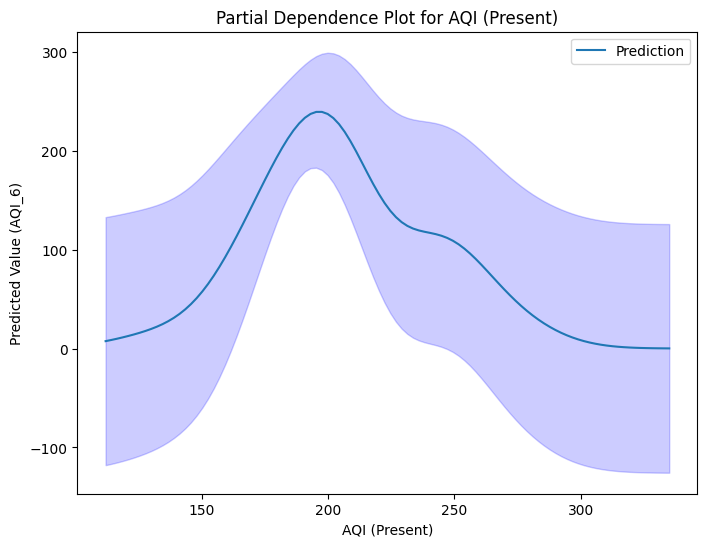

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate values for 'pm2.5' (2nd feature) from 55 to 172
pm_values = np.linspace(112, 335, 100)

# Compute mean of all other features (excluding target)
X_mean = np.mean(df.iloc[:, :-1], axis=0)  # Assuming last column is the target

# Create input grid with 'pm2.5' varying and other features fixed at their mean
X_grid = np.tile(X_mean, (len(pm_values), 1))  # Copy mean values for all rows
X_grid[:, 7] = pm_values  # Update only the 2nd feature ('pm2.5')

# Predict using the GP model
y_pred, std_dev = gp.predict(X_grid, return_std=True)

# Plot PDP
plt.figure(figsize=(8, 6))
plt.plot(pm_values, y_pred, label='Prediction')
plt.fill_between(pm_values, y_pred - std_dev, y_pred + std_dev, alpha=0.2, color='blue')
plt.title('Partial Dependence Plot for AQI (Present)')
plt.xlabel('AQI (Present)')
plt.ylabel('Predicted Value (AQI_6)')
plt.legend()
plt.show()


In [ ]:
df.head(1)

,time,pm2.5,pm10,co,so2,no2,o3,aqi,aqi_6
0,23,150,260,1160,4,13,9,322,177


In [ ]:
print(df['aqi'].max())

335


In [ ]:
print("Optimized Kernel:", gp.kernel_)

Optimized Kernel: 126**2 * RBF(length_scale=18.5)


# Tree based

In [ ]:
# prompt: calculate mean absolute error for DecisionTreeRegressor, ExtraTreeRegressor, and XGBRegressor

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from xgboost import XGBRegressor

#Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
dt_mae = mean_absolute_error(y_test, dt_pred)
print("Decision Tree Mean Absolute Error:", dt_mae)

#Extra Tree Regressor
et_model = ExtraTreesRegressor(random_state=42)
et_model.fit(X_train,y_train)
et_pred = et_model.predict(X_test)
et_mae = mean_absolute_error(y_test,et_pred)
print("Extra Tree Mean Absolute Error:", et_mae)

#XGB Regressor
xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train,y_train)
xgb_pred = xgb_model.predict(X_test)
xgb_mae = mean_absolute_error(y_test,xgb_pred)
print("XGBoost Mean Absolute Error:",xgb_mae)


Decision Tree Mean Absolute Error: 10.993506493506494
Extra Tree Mean Absolute Error: 10.158311688311688
XGBoost Mean Absolute Error: 11.850059509277344


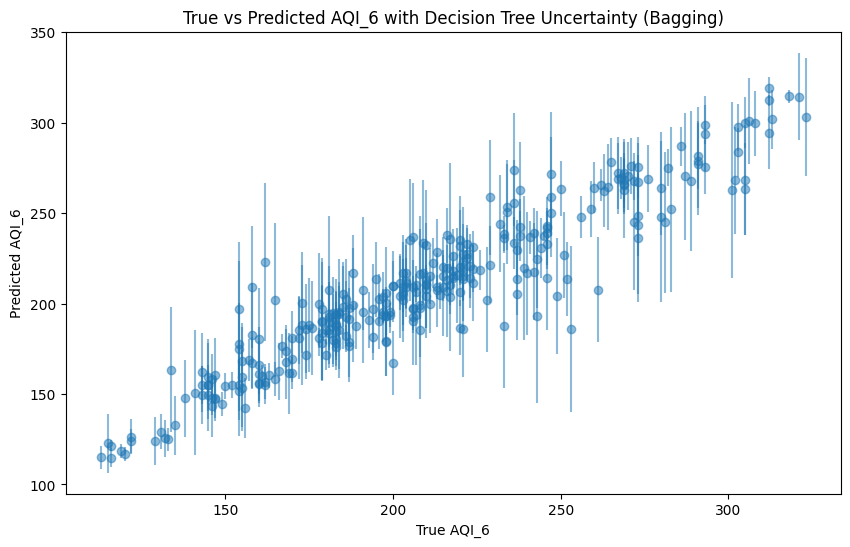

In [ ]:
!pip install lightgbm
import lightgbm as lgb
!pip install catboost
from catboost import CatBoostRegressor

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.9 MB/s eta 0:00:00


In [ ]:
# prompt: calculate mean absolute error for HGBoost, LightGBM, CatBoost

# LightGBM


lgb_model = lgb.LGBMRegressor(random_state=42)
lgb_model.fit(X_train, y_train)
lgb_pred = lgb_model.predict(X_test)
lgb_mae = mean_absolute_error(y_test, lgb_pred)
print("LightGBM Mean Absolute Error:", lgb_mae)


# CatBoost





[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000531 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 760
[LightGBM] [Info] Number of data points in the train set: 1228, number of used features: 8
[LightGBM] [Info] Start training from score 210.128664
LightGBM Mean Absolute Error: 13.647801570907715
CatBoost Mean Absolute Error: 12.371562440500004


In [ ]:
cat_model = CatBoostRegressor(random_state=42, verbose=0) #Setting verbose to 0 to suppress training output
cat_model.fit(X_train, y_train)
cat_pred = cat_model.predict(X_test)
cat_mae = mean_absolute_error(y_test, cat_pred)
print("CatBoost Mean Absolute Error:", cat_mae)

CatBoost Mean Absolute Error: 12.371562440500004


In [ ]:
cat_model.save_model('AQI_Forecaster.cbm')

In [ ]:
# prompt: calculate mean absolute error for Histogram Gradient Boosting
from sklearn.ensemble import HistGradientBoostingRegressor
# Histogram Gradient Boosting
hist_model = HistGradientBoostingRegressor(random_state=42)
hist_model.fit(X_train, y_train)
hist_pred = hist_model.predict(X_test)
hist_mae = mean_absolute_error(y_test, hist_pred)
print("Histogram Gradient Boosting Mean Absolute Error:", hist_mae)


Histogram Gradient Boosting Mean Absolute Error: 13.241649754501763


# Inference time

In [ ]:
import time


In [ ]:

start_time = time.time()
pred = dt_model.predict(X_test)
end_time = time.time()

inference_time = (end_time - start_time)* 1000
print(inference_time)

5.669355392456055


In [ ]:
start_time = time.time()
pred = et_model.predict(X_test)
end_time = time.time()

inference_time = (end_time - start_time)* 1000
print(inference_time)

91.30120277404785


In [ ]:
start_time = time.time()
pred = xgb_model.predict(X_test)
end_time = time.time()

inference_time = (end_time - start_time)* 1000
print(inference_time)

11.000633239746094


In [ ]:
start_time = time.time()
pred = hist_model.predict(X_test)
end_time = time.time()

inference_time = (end_time - start_time)* 1000
print(inference_time)

20.829200744628906


In [ ]:
start_time = time.time()
pred = cat_model.predict(X_test)
end_time = time.time()

inference_time = (end_time - start_time)* 1000
print(inference_time)

2.8836727142333984


In [ ]:
start_time = time.time()
pred = lgb_model.predict(X_test)
end_time = time.time()

inference_time = (end_time - start_time)* 1000
print(inference_time)

6.33549690246582


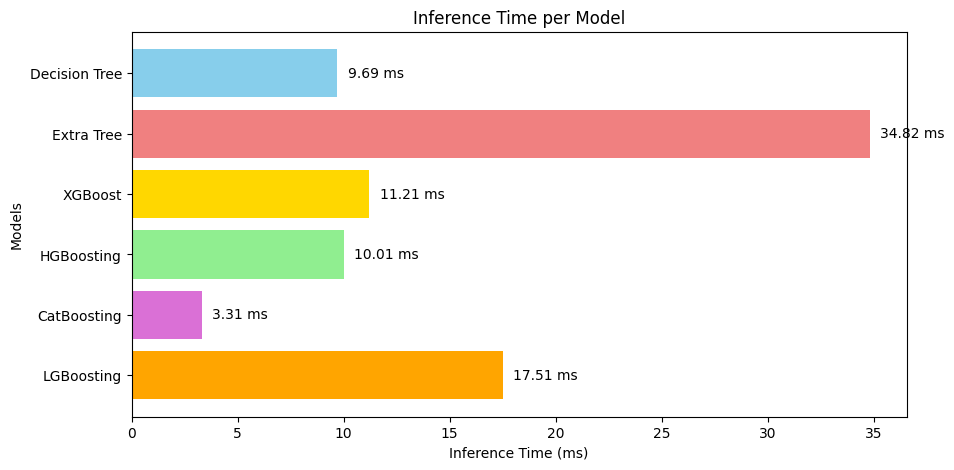

In [ ]:
import matplotlib.pyplot as plt

# Model names and their respective inference times (in milliseconds)
models = ['Decision Tree', 'Extra Tree', 'XGBoost', 'HGBoosting', 'CatBoosting', 'LGBoosting']
inference_times = [9.69, 34.82, 11.21, 10.01, 3.31, 17.51]

# Create bar plot
plt.figure(figsize=(10, 5))
plt.barh(models, inference_times, color=['skyblue', 'lightcoral', 'gold', 'lightgreen', 'orchid', 'orange'])

# Labels and title
plt.xlabel('Inference Time (ms)')
plt.ylabel('Models')
plt.title('Inference Time per Model')
plt.gca().invert_yaxis()  # Ensures the fastest model is at the top

# Display values on bars
for index, value in enumerate(inference_times):
    plt.text(value + 0.5, index, f"{value:.2f} ms", va='center', fontsize=10)

# Show plot
plt.show()


# SHAP

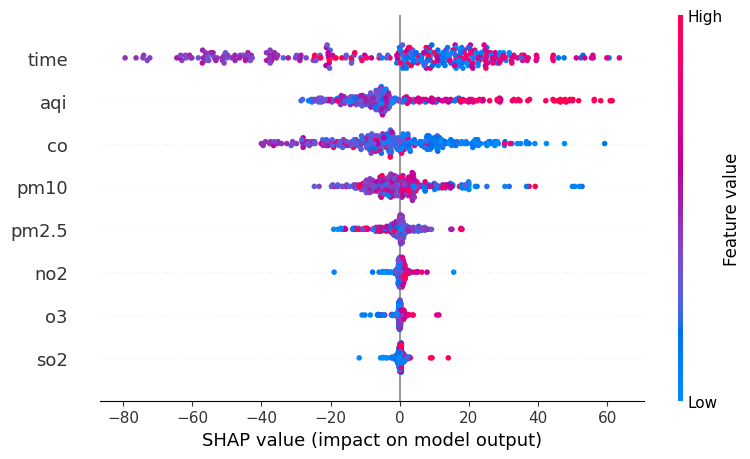

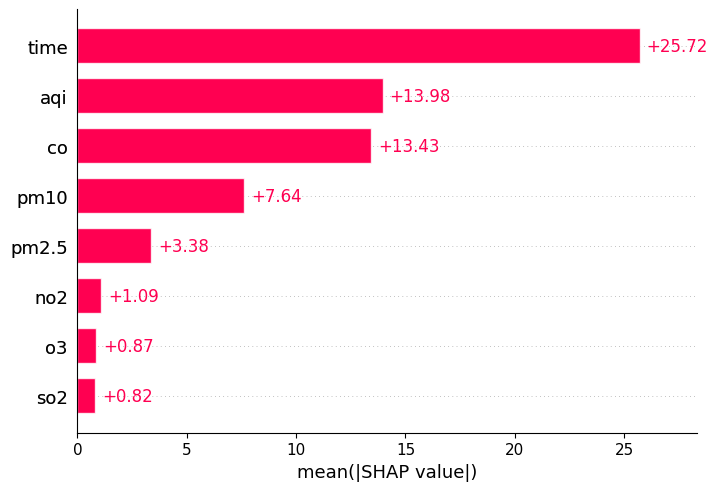

<Figure size 640x480 with 0 Axes>

In [ ]:
import shap
import matplotlib.pyplot as plt
import numpy as np




# Train the Decision Tree Regressor
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# SHAP Explainer
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)

# Feature Importance Plot
plt.figure(figsize=(10, 5))
shap.summary_plot(shap_values, X_test)
plt.show()

# Bar Plot for Feature Importance
shap.plots.bar(shap_values)

# Save figures
plt.savefig("shap_summary_plot.png")


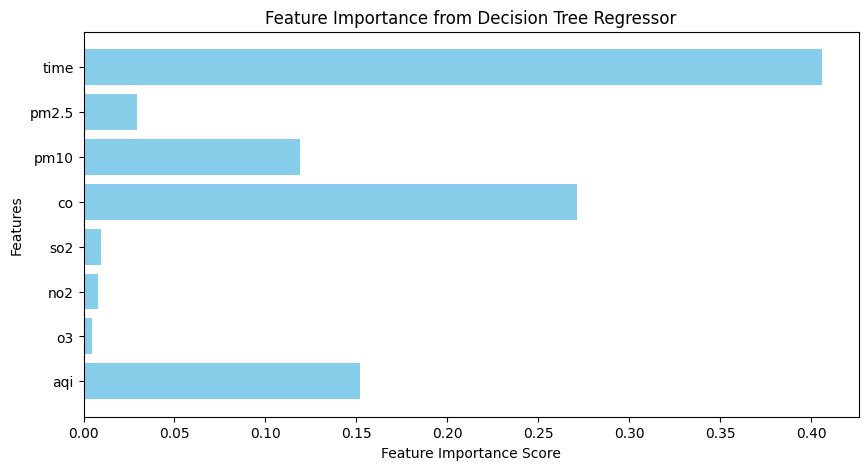

<Figure size 640x480 with 0 Axes>

In [ ]:


# Decision Tree Feature Importance
feature_importance = model.feature_importances_
features = X.columns

# Create Bar Chart
plt.figure(figsize=(10, 5))
plt.barh(features, feature_importance, color='skyblue')
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance from Decision Tree Regressor')
plt.gca().invert_yaxis()  # Highest importance at the top
plt.show()

# Save Feature Importance Plot
plt.savefig("feature_importance_dt.png")


# Hybrid Models

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error

# Split data (as given)
X = df.drop(columns=['aqi_6'], axis=1)
y = df['aqi_6']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Define base models
dt = DecisionTreeRegressor(random_state=123)
xgb = XGBRegressor(n_estimators=100, random_state=123)
lgb = LGBMRegressor(n_estimators=100, random_state=123)

# Train base models
dt.fit(X_train, y_train)
xgb.fit(X_train, y_train)
lgb.fit(X_train, y_train)

# Get predictions from base models (for meta-model training)
train_pred_dt = dt.predict(X_train)
train_pred_xgb = xgb.predict(X_train)
train_pred_lgb = lgb.predict(X_train)

# Stack predictions as new features for meta-model
stacked_train = np.column_stack((train_pred_dt, train_pred_xgb, train_pred_lgb))

# Train the meta-learner (Ridge Regression)
meta_model = Ridge(alpha=1.0)
meta_model.fit(stacked_train, y_train)

# Get test set predictions from base models
test_pred_dt = dt.predict(X_test)
test_pred_xgb = xgb.predict(X_test)
test_pred_lgb = lgb.predict(X_test)

# Stack test predictions
stacked_test = np.column_stack((test_pred_dt, test_pred_xgb, test_pred_lgb))

# Final predictions using Ridge Regression
final_predictions = meta_model.predict(stacked_test)

# Evaluate performance
mae = mean_absolute_error(y_test, final_predictions)
print(f"Stacked Model MAE: {mae:.4f}")


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000177 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 760
[LightGBM] [Info] Number of data points in the train set: 1228, number of used features: 8
[LightGBM] [Info] Start training from score 210.128664
Stacked Model MAE: 10.9135


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
import xgboost as xgb
from sklearn.metrics import mean_absolute_error

# Assuming df is your DataFrame
X = df.drop(columns=['aqi_6'], axis=1)
y = df['aqi_6']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Normalize the data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape the data to be compatible with LSTM (samples, time steps, features)
# Here, we use a time window of 1 (simple univariate time series forecasting)
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Build the LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(50, return_sequences=False, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
lstm_model.add(Dense(1))

# Compile and fit the LSTM model
lstm_model.compile(optimizer='adam', loss='mean_squared_error')
lstm_model.fit(X_train_reshaped, y_train, epochs=800, batch_size=32, validation_data=(X_test_reshaped, y_test))

# Get predictions from LSTM
lstm_train_preds = lstm_model.predict(X_train_reshaped)
lstm_test_preds = lstm_model.predict(X_test_reshaped)

# Train the XGBoost model using LSTM outputs as features
# We will stack the LSTM predictions with the original features to train XGBoost
X_train_xgb = np.hstack((X_train_scaled, lstm_train_preds))
X_test_xgb = np.hstack((X_test_scaled, lstm_test_preds))

# Train XGBoost model
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=0.3, learning_rate=0.1, max_depth=5, alpha=10, n_estimators=100)
xg_reg.fit(X_train_xgb, y_train)

# Make predictions with the hybrid model
y_pred = xg_reg.predict(X_test_xgb)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Squared Error of the Hybrid Model: {mae}')


Epoch 1/800


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


39/39 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 45877.4844 - val_loss: 46030.4688
Epoch 2/800
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 46480.5898 - val_loss: 45668.8359
Epoch 3/800
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 46309.2773 - val_loss: 45040.0664
Epoch 4/800
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 44811.6484 - val_loss: 44148.3086
Epoch 5/800
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 43985.2344 - val_loss: 43085.9336
Epoch 6/800
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 42964.6367 - val_loss: 41949.5664
Epoch 7/800
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 42240.2969 - val_loss: 40802.9453
Epoch 8/800
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 40392.4297 - val_loss: 39691.1445
Epoch 9/800
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 39472.2227 - val_loss: 38626.3281
Epoch 10/800
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 38556.6367 - val_loss: 37609.5156
Epoch 11/800
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 37725.9609 - val_los

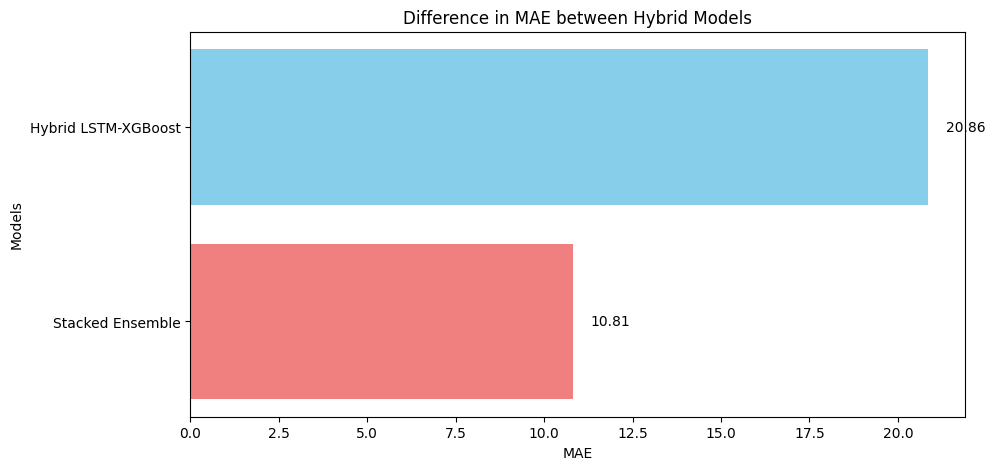

In [ ]:
import matplotlib.pyplot as plt

# Model names and their respective inference times (in milliseconds)
models = ['Hybrid LSTM-XGBoost', 'Stacked Ensemble']
inference_times = [20.86, 10.81]

# Create bar plot
plt.figure(figsize=(10, 5))
plt.barh(models, inference_times, color=['skyblue', 'lightcoral'])

# Labels and title
plt.xlabel('MAE')
plt.ylabel('Models')
plt.title('Difference in MAE between Hybrid Models')
plt.gca().invert_yaxis()  # Ensures the fastest model is at the top

# Display values on bars
for index, value in enumerate(inference_times):
    plt.text(value + 0.5, index, f"{value:.2f}", va='center', fontsize=10)

# Show plot
plt.show()


In [ ]:
start_time = time.time()
pred = meta_model.predict(stacked_test)
end_time = time.time()

inference_time = (end_time - start_time)* 1000
print(inference_time)

5.467891693115234


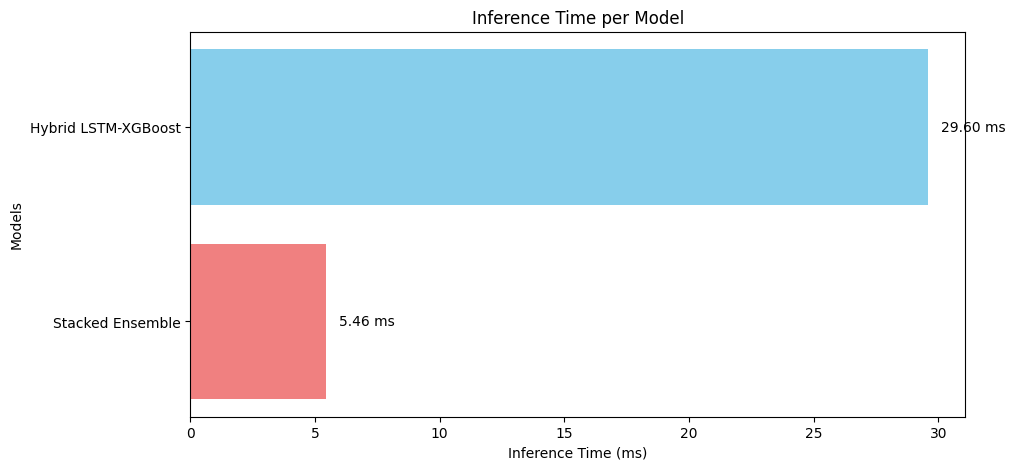

In [ ]:
import matplotlib.pyplot as plt

# Model names and their respective inference times (in milliseconds)
models = ['Hybrid LSTM-XGBoost', 'Stacked Ensemble']
inference_times = [29.60, 5.46]

# Create bar plot
plt.figure(figsize=(10, 5))
plt.barh(models, inference_times, color=['skyblue', 'lightcoral'])

# Labels and title
plt.xlabel('Inference Time (ms)')
plt.ylabel('Models')
plt.title('Inference Time per Model')
plt.gca().invert_yaxis()  # Ensures the fastest model is at the top

# Display values on bars
for index, value in enumerate(inference_times):
    plt.text(value + 0.5, index, f"{value:.2f} ms", va='center', fontsize=10)

# Show plot
plt.show()


Epoch 1/400


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 64ms/step - loss: 211.9057 - val_loss: 209.6000
Epoch 2/400
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 210.5353 - val_loss: 207.3703
Epoch 3/400
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 205.4327 - val_loss: 198.3817
Epoch 4/400
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 194.6326 - val_loss: 192.5919
Epoch 5/400
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 193.4816 - val_loss: 189.8103
Epoch 6/400
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 190.1535 - val_loss: 187.5341
Epoch 7/400
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 188.6693 - val_loss: 185.4533
Epoch 8/400
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 184.7873 - val_loss: 183.4844
Epoch 9/400
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 183.4200 - val_loss: 181.5894
Epoch 10/400
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 181.7907 - val_loss: 179.7475
Epoch 11/400
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 178.1497 - val_loss: 177.9453
Epoch 12/400
20/20 ━

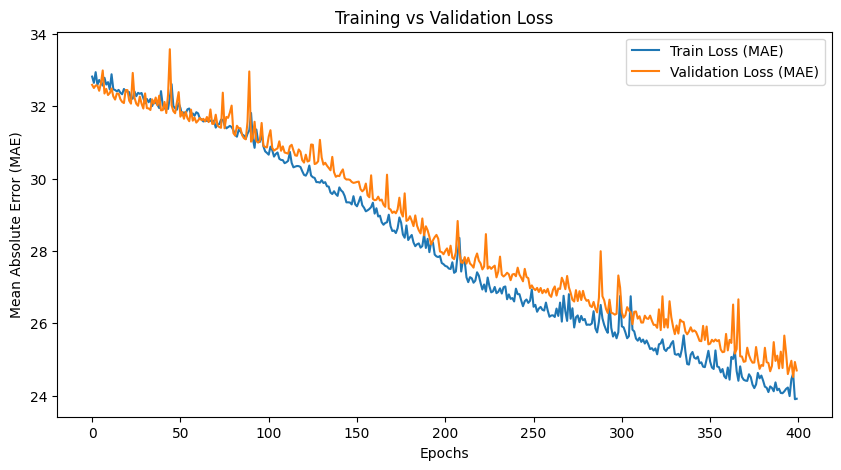

39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Mean Abs Error of the Hybrid Model: 18.900653839111328


In [ ]:
# Normalize the data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape the data to be compatible with LSTM (samples, time steps, features)
# Here, we use a time window of 1 (simple univariate time series forecasting)
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Build the LSTM model
lstm_model = Sequential()
# First LSTM Layer (returns sequences to pass to the next LSTM)
lstm_model.add(LSTM(100, return_sequences=True, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))

# Second LSTM Layer (also returns sequences)
lstm_model.add(LSTM(100, return_sequences=True))

# Third LSTM Layer (only returns the final state)
lstm_model.add(LSTM(100, return_sequences=False))

# Fully Connected Layer
lstm_model.add(Dense(1))  # Single output (for regression or binary classification)

# Compile and fit the LSTM model
lstm_model.compile(optimizer='adam', loss='mean_absolute_error')
lstm_model.fit(X_train_reshaped, y_train, epochs=400, batch_size=64, validation_data=(X_test_reshaped, y_test))

# Train the LSTM model and store training history
history = lstm_model.fit(X_train_reshaped, y_train,
                         epochs=400, batch_size=64,
                         validation_data=(X_test_reshaped, y_test))

# Plot train vs. validation loss curves
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss (MAE)')
plt.plot(history.history['val_loss'], label='Validation Loss (MAE)')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Training vs Validation Loss')
plt.legend()
plt.show()

# Get predictions from LSTM
lstm_train_preds = lstm_model.predict(X_train_reshaped)
lstm_test_preds = lstm_model.predict(X_test_reshaped)

# Train the XGBoost model using LSTM outputs as features
# We will stack the LSTM predictions with the original features to train XGBoost
X_train_xgb = np.hstack((X_train_scaled, lstm_train_preds))
X_test_xgb = np.hstack((X_test_scaled, lstm_test_preds))

# Train XGBoost model
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=0.3, learning_rate=0.1, max_depth=5, alpha=10, n_estimators=100)
xg_reg.fit(X_train_xgb, y_train)

# Make predictions with the hybrid model
y_pred = xg_reg.predict(X_test_xgb)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Abs Error of the Hybrid Model: {mae}')


# Uncertainty measurements

## DT Uncertainty
While Decision Trees are single models (unlike Random Forests, which are ensembles of trees), we can still estimate uncertainty by using Bagging or Bootstrap Aggregating. Bagging involves training multiple Decision Trees on different subsets of the data and then aggregating their predictions to estimate uncertainty.

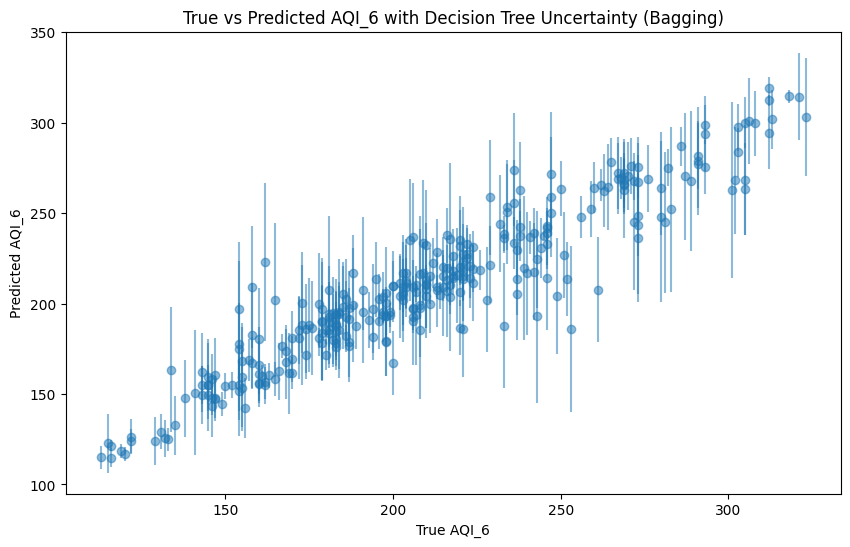

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
import numpy as np
import matplotlib.pyplot as plt

# Create a Bagging Regressor with Decision Trees
n_estimators = 100  # Number of Decision Trees
model = BaggingRegressor(
    estimator=DecisionTreeRegressor(random_state=42), # Changed 'base_estimator' to 'estimator'
    n_estimators=n_estimators,
    random_state=42
)

# Train the model
model.fit(X_train, y_train)

# Predict with uncertainty (standard deviation of predictions across trees)
predictions = np.array([tree.predict(X_test) for tree in model.estimators_])
y_mean = np.mean(predictions, axis=0)  # Mean prediction
y_std = np.std(predictions, axis=0)   # Standard deviation of predictions

# Plot the results with uncertainty
plt.figure(figsize=(10, 6))
plt.errorbar(y_test, y_mean, yerr=y_std, fmt='o', alpha=0.5)
plt.xlabel('True AQI_6')
plt.ylabel('Predicted AQI_6')
plt.title('True vs Predicted AQI_6 with Decision Tree Uncertainty (Bagging)')
plt.show()

In [ ]:
ci_lower = y_mean - 1.96 * y_std
ci_upper = y_mean + 1.96 * y_std

# Quantify uncertainty numerically
mean_uncertainty = np.mean(y_std)  # Average standard deviation
ci_range = np.mean(ci_upper - ci_lower)  # Average range of the confidence interval

# Mean Absolute Deviation (MAD)
mad = np.mean(np.abs(predictions - y_mean), axis=0)

# Range of predictions
range_uncertainty = np.mean(np.max(predictions, axis=0) - np.min(predictions, axis=0))

# Print uncertainty metrics
print(f"Mean Uncertainty (Standard Deviation): {mean_uncertainty}")
print(f"Mean Confidence Interval Range: {ci_range}")
print(f"Mean Absolute Deviation (MAD): {np.mean(mad)}")
print(f"Mean Range of Predictions: {range_uncertainty}")

Mean Uncertainty (Standard Deviation): 18.68113342864664
Mean Confidence Interval Range: 73.23004304029483
Mean Absolute Deviation (MAD): 14.076381168831167
Mean Range of Predictions: 85.25324675324676


## ET Uncertainty

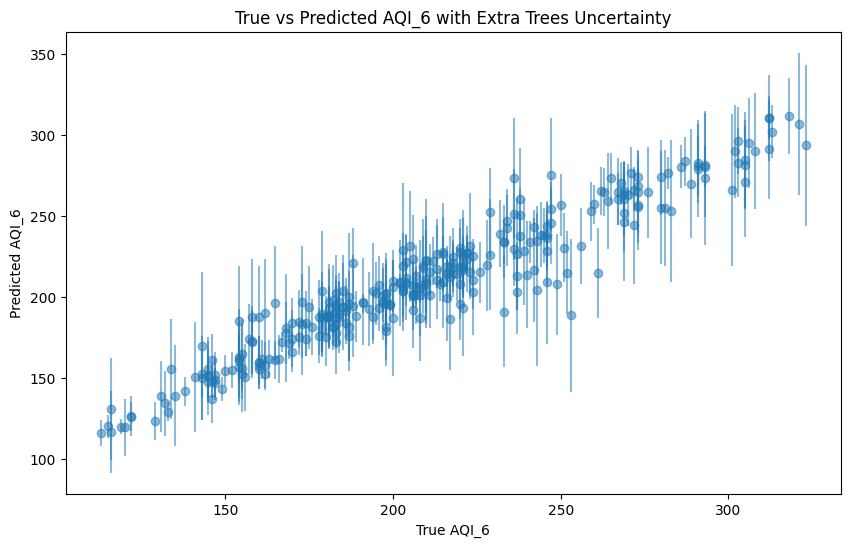

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
import numpy as np
import matplotlib.pyplot as plt

# Create an Extra Trees Regressor
model = ExtraTreesRegressor(random_state=42)  # Default hyperparameters

# Train the model
model.fit(X_train, y_train)

# Predict with uncertainty (standard deviation of predictions across trees)
predictions = np.array([tree.predict(X_test) for tree in model.estimators_])
y_mean = np.mean(predictions, axis=0)  # Mean prediction
y_std = np.std(predictions, axis=0)   # Standard deviation of predictions

# Plot the results with uncertainty
plt.figure(figsize=(10, 6))
plt.errorbar(y_test, y_mean, yerr=y_std, fmt='o', alpha=0.5)
plt.xlabel('True AQI_6')
plt.ylabel('Predicted AQI_6')
plt.title('True vs Predicted AQI_6 with Extra Trees Uncertainty')
plt.show()


In [ ]:
ci_lower = y_mean - 1.96 * y_std
ci_upper = y_mean + 1.96 * y_std

# Quantify uncertainty numerically
mean_uncertainty = np.mean(y_std)  # Average standard deviation
ci_range = np.mean(ci_upper - ci_lower)  # Average range of the confidence interval

# Mean Absolute Deviation (MAD)
mad = np.mean(np.abs(predictions - y_mean), axis=0)

# Range of predictions
range_uncertainty = np.mean(np.max(predictions, axis=0) - np.min(predictions, axis=0))

# Print uncertainty metrics
print(f"Mean Uncertainty (Standard Deviation): {mean_uncertainty}")
print(f"Mean Confidence Interval Range: {ci_range}")
print(f"Mean Absolute Deviation (MAD): {np.mean(mad)}")
print(f"Mean Range of Predictions: {range_uncertainty}")

Mean Uncertainty (Standard Deviation): 20.756475198492176
Mean Confidence Interval Range: 81.36538277808934
Mean Absolute Deviation (MAD): 14.621192207792207
Mean Range of Predictions: 112.07142857142857


## XGB Uncertainty

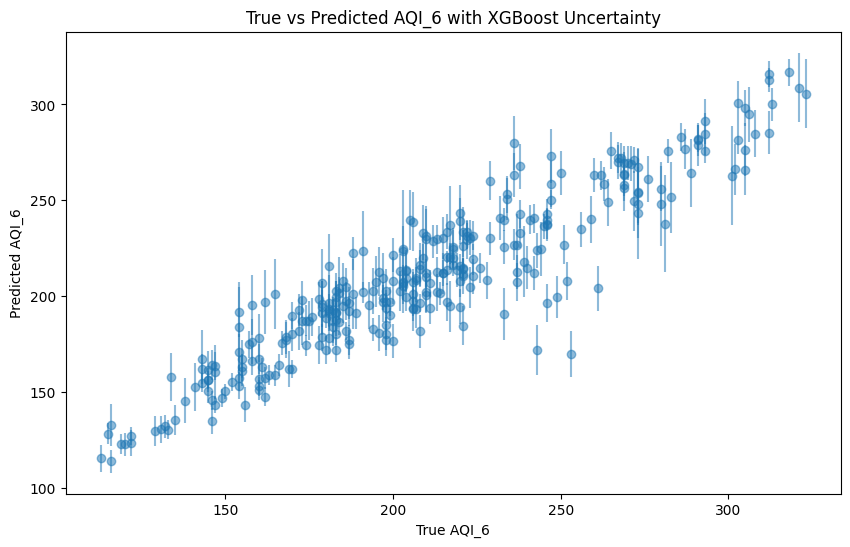

In [ ]:
from xgboost import XGBRegressor
import numpy as np
import matplotlib.pyplot as plt

# Create an XGB Regressor model
xgb_model = XGBRegressor(random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Bootstrapping: Create multiple predictions by sampling with replacement
n_estimators = 100
predictions = np.zeros((n_estimators, len(X_test)))

# Generate bootstrap samples and make predictions
for i in range(n_estimators):
    # Create a bootstrap sample from the training data
    bootstrap_sample_idx = np.random.choice(len(X_train), size=len(X_train), replace=True)
    X_train_bootstrap = X_train[bootstrap_sample_idx]
    y_train_bootstrap = y_train[bootstrap_sample_idx]

    # Train the model on the bootstrap sample
    xgb_model.fit(X_train_bootstrap, y_train_bootstrap)

    # Make predictions on the test set
    predictions[i, :] = xgb_model.predict(X_test)

# Compute the mean prediction and standard deviation for uncertainty
y_mean = np.mean(predictions, axis=0)  # Mean prediction
y_std = np.std(predictions, axis=0)    # Standard deviation (uncertainty)

# Plot the results with uncertainty
plt.figure(figsize=(10, 6))
plt.errorbar(y_test, y_mean, yerr=y_std, fmt='o', alpha=0.5)
plt.xlabel('True AQI_6')
plt.ylabel('Predicted AQI_6')
plt.title('True vs Predicted AQI_6 with XGBoost Uncertainty')
plt.show()


In [ ]:
ci_lower = y_mean - 1.96 * y_std
ci_upper = y_mean + 1.96 * y_std

# Quantify uncertainty numerically
mean_uncertainty = np.mean(y_std)  # Average standard deviation
ci_range = np.mean(ci_upper - ci_lower)  # Average range of the confidence interval

# Mean Absolute Deviation (MAD)
mad = np.mean(np.abs(predictions - y_mean), axis=0)

# Range of predictions
range_uncertainty = np.mean(np.max(predictions, axis=0) - np.min(predictions, axis=0))

# Print uncertainty metrics
print(f"Mean Uncertainty (Standard Deviation): {mean_uncertainty}")
print(f"Mean Confidence Interval Range: {ci_range}")
print(f"Mean Absolute Deviation (MAD): {np.mean(mad)}")
print(f"Mean Range of Predictions: {range_uncertainty}")

Mean Uncertainty (Standard Deviation): 9.722172850409892
Mean Confidence Interval Range: 38.11091757360678
Mean Absolute Deviation (MAD): 7.561794987780088
Mean Range of Predictions: 51.05764597112482


# LGB Uncertainty

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000226 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 760
[LightGBM] [Info] Number of data points in the train set: 1228, number of used features: 8
[LightGBM] [Info] Start training from score 210.128664
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000137 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 739
[LightGBM] [Info] Number of data points in the train set: 1228, number of used features: 8
[LightGBM] [Info] Start training from score 209.471498
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000120 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 741
[LightGBM] [Info] Number of data points in the train set: 1228, number of used features: 8
[LightGBM] [Info] Start training

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000127 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 742
[LightGBM] [Info] Number of data points in the train set: 1228, number of used features: 8
[LightGBM] [Info] Start training from score 212.211726
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000073 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 731
[LightGBM] [Info] Number of data points in the train set: 1228, number of used features: 8
[LightGBM] [Info] Start training from score 209.407166
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000122 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 740
[LightGBM] [Info] Number of data points in the train set: 1

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000137 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 723
[LightGBM] [Info] Number of data points in the train set: 1228, number of used features: 8
[LightGBM] [Info] Start training from score 211.382736
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000123 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 742
[LightGBM] [Info] Number of data points in the train set: 1228, number of used features: 8
[LightGBM] [Info] Start training from score 209.618893
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000074 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 730
[LightGBM] [Info] Number of data points in the train set: 1

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000118 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 728
[LightGBM] [Info] Number of data points in the train set: 1228, number of used features: 8
[LightGBM] [Info] Start training from score 207.973127
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000124 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 722
[LightGBM] [Info] Number of data points in the train set: 1228, number of used features: 8
[LightGBM] [Info] Start training from score 209.880293
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000194 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 735
[LightGBM] [Info] Number of data points in the train set: 1228, number of used features: 8
[LightGBM] [Info] Start training

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000118 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 729
[LightGBM] [Info] Number of data points in the train set: 1228, number of used features: 8
[LightGBM] [Info] Start training from score 209.270358
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000118 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 729
[LightGBM] [Info] Number of data points in the train set: 1228, number of used features: 8
[LightGBM] [Info] Start training from score 211.045603
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000124 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 737
[LightGBM] [Info] Number of data points in the train set: 1228, number of used features: 8
[LightGBM] [Info] Start training

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000132 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 731
[LightGBM] [Info] Number of data points in the train set: 1228, number of used features: 8
[LightGBM] [Info] Start training from score 212.004072
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000115 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 734
[LightGBM] [Info] Number of data points in the train set: 1228, number of used features: 8
[LightGBM] [Info] Start training from score 212.311889
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000113 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 734
[LightGBM] [Info] Number of data points in the train set: 1228, number of used features: 8
[LightGBM] [Info] Start training

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000197 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 739
[LightGBM] [Info] Number of data points in the train set: 1228, number of used features: 8
[LightGBM] [Info] Start training from score 209.403094
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000119 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 729
[LightGBM] [Info] Number of data points in the train set: 1228, number of used features: 8
[LightGBM] [Info] Start training from score 211.643322
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000113 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 737
[LightGBM] [Info] Number of data points in the train set: 1228, number of used features: 8
[LightGBM] [Info] Start training

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000132 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 732
[LightGBM] [Info] Number of data points in the train set: 1228, number of used features: 8
[LightGBM] [Info] Start training from score 209.860749
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000132 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 732
[LightGBM] [Info] Number of data points in the train set: 1228, number of used features: 8
[LightGBM] [Info] Start training from score 208.499186
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000113 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 735
[LightGBM] [Info] Number of data points in the train set: 1228, number of used features: 8
[LightGBM] [Info] Start training

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000172 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 740
[LightGBM] [Info] Number of data points in the train set: 1228, number of used features: 8
[LightGBM] [Info] Start training from score 209.322476
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000116 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 723
[LightGBM] [Info] Number of data points in the train set: 1228, number of used features: 8
[LightGBM] [Info] Start training from score 208.892508
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000112 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 738
[LightGBM] [Info] Number of data points in the train set: 1228, number of used features: 8
[LightGBM] [Info] Start training

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000126 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 730
[LightGBM] [Info] Number of data points in the train set: 1228, number of used features: 8
[LightGBM] [Info] Start training from score 209.796417
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000118 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 728
[LightGBM] [Info] Number of data points in the train set: 1228, number of used features: 8
[LightGBM] [Info] Start training from score 209.728827
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000111 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 735
[LightGBM] [Info] Number of data points in the train set: 1228, number of used features: 8
[LightGBM] [Info] Start training

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000146 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 729
[LightGBM] [Info] Number of data points in the train set: 1228, number of used features: 8
[LightGBM] [Info] Start training from score 208.710912
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000117 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 724
[LightGBM] [Info] Number of data points in the train set: 1228, number of used features: 8
[LightGBM] [Info] Start training from score 209.256515
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000121 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 733
[LightGBM] [Info] Number of data points in the train set: 1228, number of used features: 8
[LightGBM] [Info] Start training

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000115 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 728
[LightGBM] [Info] Number of data points in the train set: 1228, number of used features: 8
[LightGBM] [Info] Start training from score 212.323290
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000131 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 733
[LightGBM] [Info] Number of data points in the train set: 1228, number of used features: 8
[LightGBM] [Info] Start training from score 210.930782
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000116 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 733
[LightGBM] [Info] Number of data points in the train set: 1228, number of used features: 8
[LightGBM] [Info] Start training

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000131 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 736
[LightGBM] [Info] Number of data points in the train set: 1228, number of used features: 8
[LightGBM] [Info] Start training from score 211.364821
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000119 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 742
[LightGBM] [Info] Number of data points in the train set: 1228, number of used features: 8
[LightGBM] [Info] Start training from score 209.969870
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000130 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 739
[LightGBM] [Info] Number of data points in the train set: 1228, number of used features: 8
[LightGBM] [Info] Start training

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000160 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 726
[LightGBM] [Info] Number of data points in the train set: 1228, number of used features: 8
[LightGBM] [Info] Start training from score 209.161238
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000118 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 731
[LightGBM] [Info] Number of data points in the train set: 1228, number of used features: 8
[LightGBM] [Info] Start training from score 209.078176
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000121 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 733
[LightGBM] [Info] Number of data points in the train set: 1228, number of used features: 8
[LightGBM] [Info] Start training

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000146 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 743
[LightGBM] [Info] Number of data points in the train set: 1228, number of used features: 8
[LightGBM] [Info] Start training from score 211.788274
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000119 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 729
[LightGBM] [Info] Number of data points in the train set: 1228, number of used features: 8
[LightGBM] [Info] Start training from score 210.241857
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000119 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 736
[LightGBM] [Info] Number of data points in the train set: 1228, number of used features: 8
[LightGBM] [Info] Start training

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000120 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 723
[LightGBM] [Info] Number of data points in the train set: 1228, number of used features: 8
[LightGBM] [Info] Start training from score 208.492671
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000146 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 733
[LightGBM] [Info] Number of data points in the train set: 1228, number of used features: 8
[LightGBM] [Info] Start training from score 209.362378
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000121 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 729
[LightGBM] [Info] Number of data points in the train set: 1228, number of used features: 8
[LightGBM] [Info] Start training

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000197 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 725
[LightGBM] [Info] Number of data points in the train set: 1228, number of used features: 8
[LightGBM] [Info] Start training from score 208.789088
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000161 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 743
[LightGBM] [Info] Number of data points in the train set: 1228, number of used features: 8
[LightGBM] [Info] Start training from score 209.880293
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000120 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 718
[LightGBM] [Info] Number of data points in the train set: 1228, number of used features: 8
[LightGBM] [Info] Start training

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000119 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 731
[LightGBM] [Info] Number of data points in the train set: 1228, number of used features: 8
[LightGBM] [Info] Start training from score 210.198697
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000117 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 733
[LightGBM] [Info] Number of data points in the train set: 1228, number of used features: 8
[LightGBM] [Info] Start training from score 210.214169
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000115 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 731
[LightGBM] [Info] Number of data points in the train set: 1228, number of used features: 8
[LightGBM] [Info] Start training

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000120 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 721
[LightGBM] [Info] Number of data points in the train set: 1228, number of used features: 8
[LightGBM] [Info] Start training from score 209.153909
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000119 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 731
[LightGBM] [Info] Number of data points in the train set: 1228, number of used features: 8
[LightGBM] [Info] Start training from score 212.290717
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000118 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 729
[LightGBM] [Info] Number of data points in the train set: 1228, number of used features: 8
[LightGBM] [Info] Start training

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000046 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 739
[LightGBM] [Info] Number of data points in the train set: 1228, number of used features: 8
[LightGBM] [Info] Start training from score 210.459283
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000049 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 729
[LightGBM] [Info] Number of data points in the train set: 1228, number of used features: 8
[LightGBM] [Info] Start training from score 211.258958
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000116 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000126 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 744
[LightGBM] [Info] Number of data points in the train set: 1228, number of used features: 8
[LightGBM] [Info] Start training from score 211.102606
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000119 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 735
[LightGBM] [Info] Number of data points in the train set: 1228, number of used features: 8
[LightGBM] [Info] Start training from score 208.820033
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000127 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 739
[LightGBM] [Info] Number of data points in the train set: 1228, number of used features: 8
[LightGBM] [Info] Start training

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000142 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 731
[LightGBM] [Info] Number of data points in the train set: 1228, number of used features: 8
[LightGBM] [Info] Start training from score 211.228013
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000131 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 739
[LightGBM] [Info] Number of data points in the train set: 1228, number of used features: 8
[LightGBM] [Info] Start training from score 209.290717
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000124 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 739
[LightGBM] [Info] Number of data points in the train set: 1228, number of used features: 8
[LightGBM] [Info] Start training

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000179 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 730
[LightGBM] [Info] Number of data points in the train set: 1228, number of used features: 8
[LightGBM] [Info] Start training from score 207.530945
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000122 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 739
[LightGBM] [Info] Number of data points in the train set: 1228, number of used features: 8
[LightGBM] [Info] Start training from score 213.178339
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000121 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 726
[LightGBM] [Info] Number of data points in the train set: 1228, number of used features: 8
[LightGBM] [Info] Start training

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000119 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 733
[LightGBM] [Info] Number of data points in the train set: 1228, number of used features: 8
[LightGBM] [Info] Start training from score 210.868078
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000049 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 728
[LightGBM] [Info] Number of data points in the train set: 1228, number of used features: 8
[LightGBM] [Info] Start training from score 210.094463
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000135 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 739
[LightGBM] [Info] Number of data points in the train set: 1

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000117 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 741
[LightGBM] [Info] Number of data points in the train set: 1228, number of used features: 8
[LightGBM] [Info] Start training from score 209.172638
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000193 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 740
[LightGBM] [Info] Number of data points in the train set: 1228, number of used features: 8
[LightGBM] [Info] Start training from score 208.878664
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000119 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 737
[LightGBM] [Info] Number of data points in the train set: 1228, number of used features: 8
[LightGBM] [Info] Start training

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000120 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 742
[LightGBM] [Info] Number of data points in the train set: 1228, number of used features: 8
[LightGBM] [Info] Start training from score 208.088762
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000119 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 736
[LightGBM] [Info] Number of data points in the train set: 1228, number of used features: 8
[LightGBM] [Info] Start training from score 209.307818


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


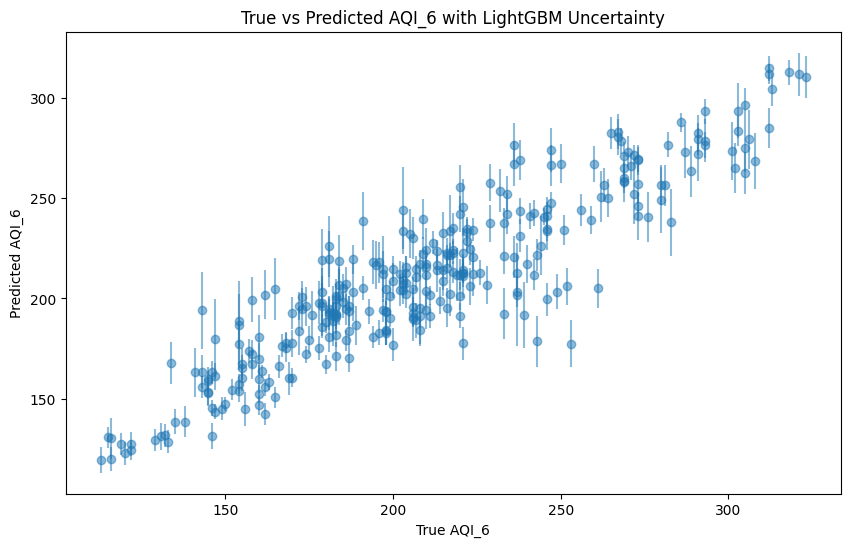

In [ ]:
import lightgbm as lgb
import numpy as np
import matplotlib.pyplot as plt

# Create a LightGBM Regressor model
lgb_model = lgb.LGBMRegressor(random_state=42)

# Train the model
lgb_model.fit(X_train, y_train)

# Bootstrapping: Create multiple predictions by sampling with replacement
n_estimators = 100
predictions = np.zeros((n_estimators, len(X_test)))

# Generate bootstrap samples and make predictions
for i in range(n_estimators):
    # Create a bootstrap sample from the training data
    bootstrap_sample_idx = np.random.choice(len(X_train), size=len(X_train), replace=True)
    X_train_bootstrap = X_train[bootstrap_sample_idx]
    y_train_bootstrap = y_train[bootstrap_sample_idx]

    # Train the model on the bootstrap sample
    lgb_model.fit(X_train_bootstrap, y_train_bootstrap)

    # Make predictions on the test set
    predictions[i, :] = lgb_model.predict(X_test)

# Compute the mean prediction and standard deviation for uncertainty
y_mean = np.mean(predictions, axis=0)  # Mean prediction
y_std = np.std(predictions, axis=0)    # Standard deviation (uncertainty)

# Plot the results with uncertainty
plt.figure(figsize=(10, 6))
plt.errorbar(y_test, y_mean, yerr=y_std, fmt='o', alpha=0.5)
plt.xlabel('True AQI_6')
plt.ylabel('Predicted AQI_6')
plt.title('True vs Predicted AQI_6 with LightGBM Uncertainty')
plt.show()


In [ ]:
ci_lower = y_mean - 1.96 * y_std
ci_upper = y_mean + 1.96 * y_std

# Quantify uncertainty numerically
mean_uncertainty = np.mean(y_std)  # Average standard deviation
ci_range = np.mean(ci_upper - ci_lower)  # Average range of the confidence interval

# Mean Absolute Deviation (MAD)
mad = np.mean(np.abs(predictions - y_mean), axis=0)

# Range of predictions
range_uncertainty = np.mean(np.max(predictions, axis=0) - np.min(predictions, axis=0))

# Print uncertainty metrics
print(f"Mean Uncertainty (Standard Deviation): {mean_uncertainty}")
print(f"Mean Confidence Interval Range: {ci_range}")
print(f"Mean Absolute Deviation (MAD): {np.mean(mad)}")
print(f"Mean Range of Predictions: {range_uncertainty}")

Mean Uncertainty (Standard Deviation): 8.530164662179628
Mean Confidence Interval Range: 33.43824547574414
Mean Absolute Deviation (MAD): 6.726640934407484
Mean Range of Predictions: 43.98095658645443


# CatBoost Uncertainty

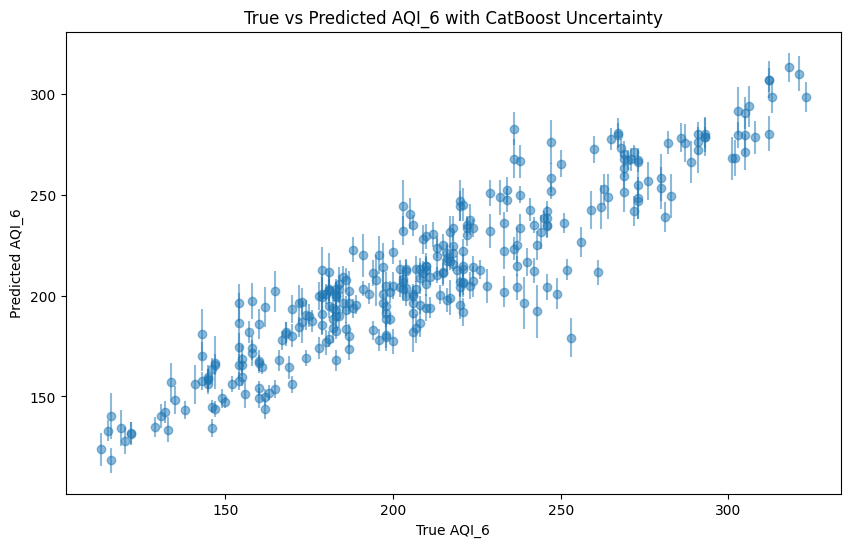

In [ ]:
from catboost import CatBoostRegressor
import numpy as np
import matplotlib.pyplot as plt

# Create a CatBoost Regressor model
cat_model = CatBoostRegressor(random_state=42, verbose=0)

# Train the model
cat_model.fit(X_train, y_train)

# Bootstrapping: Create multiple predictions by sampling with replacement
n_estimators = 100
predictions = np.zeros((n_estimators, len(X_test)))

# Generate bootstrap samples and make predictions
for i in range(n_estimators):
    # Create a bootstrap sample from the training data
    bootstrap_sample_idx = np.random.choice(len(X_train), size=len(X_train), replace=True)
    X_train_bootstrap = X_train[bootstrap_sample_idx]
    y_train_bootstrap = y_train[bootstrap_sample_idx]

    # Train the model on the bootstrap sample
    cat_model.fit(X_train_bootstrap, y_train_bootstrap)

    # Make predictions on the test set
    predictions[i, :] = cat_model.predict(X_test)

# Compute the mean prediction and standard deviation for uncertainty
y_mean = np.mean(predictions, axis=0)  # Mean prediction
y_std = np.std(predictions, axis=0)    # Standard deviation (uncertainty)

# Plot the results with uncertainty
plt.figure(figsize=(10, 6))
plt.errorbar(y_test, y_mean, yerr=y_std, fmt='o', alpha=0.5)
plt.xlabel('True AQI_6')
plt.ylabel('Predicted AQI_6')
plt.title('True vs Predicted AQI_6 with CatBoost Uncertainty')
plt.show()


In [ ]:
ci_lower = y_mean - 1.96 * y_std
ci_upper = y_mean + 1.96 * y_std

# Quantify uncertainty numerically
mean_uncertainty = np.mean(y_std)  # Average standard deviation
ci_range = np.mean(ci_upper - ci_lower)  # Average range of the confidence interval

# Mean Absolute Deviation (MAD)
mad = np.mean(np.abs(predictions - y_mean), axis=0)

# Range of predictions
range_uncertainty = np.mean(np.max(predictions, axis=0) - np.min(predictions, axis=0))

# Print uncertainty metrics
print(f"Mean Uncertainty (Standard Deviation): {mean_uncertainty}")
print(f"Mean Confidence Interval Range: {ci_range}")
print(f"Mean Absolute Deviation (MAD): {np.mean(mad)}")
print(f"Mean Range of Predictions: {range_uncertainty}")

Mean Uncertainty (Standard Deviation): 6.639378564647584
Mean Confidence Interval Range: 26.026363973418526
Mean Absolute Deviation (MAD): 5.230146045654166
Mean Range of Predictions: 34.70434685485064


## HistGrad Uncertainty

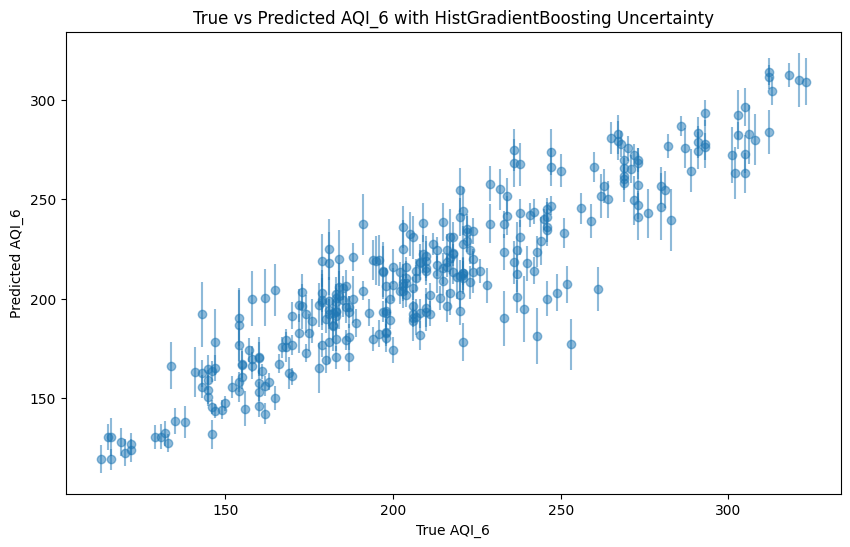

In [ ]:
from sklearn.ensemble import HistGradientBoostingRegressor
import numpy as np
import matplotlib.pyplot as plt

# Create a HistGradientBoosting Regressor model
hist_model = HistGradientBoostingRegressor(random_state=42)

# Train the model
hist_model.fit(X_train, y_train)

# Bootstrapping: Create multiple predictions by sampling with replacement
n_estimators = 100
predictions = np.zeros((n_estimators, len(X_test)))

# Generate bootstrap samples and make predictions
for i in range(n_estimators):
    # Create a bootstrap sample from the training data
    bootstrap_sample_idx = np.random.choice(len(X_train), size=len(X_train), replace=True)
    X_train_bootstrap = X_train[bootstrap_sample_idx]
    y_train_bootstrap = y_train[bootstrap_sample_idx]

    # Train the model on the bootstrap sample
    hist_model.fit(X_train_bootstrap, y_train_bootstrap)

    # Make predictions on the test set
    predictions[i, :] = hist_model.predict(X_test)

# Compute the mean prediction and standard deviation for uncertainty
y_mean = np.mean(predictions, axis=0)  # Mean prediction
y_std = np.std(predictions, axis=0)    # Standard deviation (uncertainty)

# Plot the results with uncertainty
plt.figure(figsize=(10, 6))
plt.errorbar(y_test, y_mean, yerr=y_std, fmt='o', alpha=0.5)
plt.xlabel('True AQI_6')
plt.ylabel('Predicted AQI_6')
plt.title('True vs Predicted AQI_6 with HistGradientBoosting Uncertainty')
plt.show()


In [ ]:
ci_lower = y_mean - 1.96 * y_std
ci_upper = y_mean + 1.96 * y_std

# Quantify uncertainty numerically
mean_uncertainty = np.mean(y_std)  # Average standard deviation
ci_range = np.mean(ci_upper - ci_lower)  # Average range of the confidence interval

# Mean Absolute Deviation (MAD)
mad = np.mean(np.abs(predictions - y_mean), axis=0)

# Range of predictions
range_uncertainty = np.mean(np.max(predictions, axis=0) - np.min(predictions, axis=0))

# Print uncertainty metrics
print(f"Mean Uncertainty (Standard Deviation): {mean_uncertainty}")
print(f"Mean Confidence Interval Range: {ci_range}")
print(f"Mean Absolute Deviation (MAD): {np.mean(mad)}")
print(f"Mean Range of Predictions: {range_uncertainty}")

Mean Uncertainty (Standard Deviation): 8.381029774605423
Mean Confidence Interval Range: 32.853636716453266
Mean Absolute Deviation (MAD): 6.606718224176774
Mean Range of Predictions: 43.39356340145215
